In [1]:
!pip install bar_chart_race

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import requests
from bs4 import BeautifulSoup

import bar_chart_race as bcr
from IPython.display import Video

plt.style.use('ggplot')

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 7.1 MB/s 


In [3]:
df = pd.read_excel('solicitacoes-de-reconhecimento-da-condicao-de-refugiado.xlsx',
                  )
df.head()

Tipo de Alertas e Restrições Nacionalidade  Mês/Ano  UF  Quantidade
0       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO  12/2001  DF         1.0
1       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO  01/2010  DF         1.0
2       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO  03/2010  DF         2.0
3       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO  03/2010  SP         2.0
4       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO  08/2010  DF         1.0

In [5]:
df.shape


(11670, 5)

In [4]:
df.dtypes


Tipo de Alertas e Restrições     object
Nacionalidade                    object
Mês/Ano                          object
UF                               object
Quantidade                      float64
dtype: object

In [6]:
df['Mês/Ano'] = pd.to_datetime(df['Mês/Ano'].str.replace('/', ''), format='%m%Y', errors='coerce')
df['Year'] = df['Mês/Ano'].dt.year

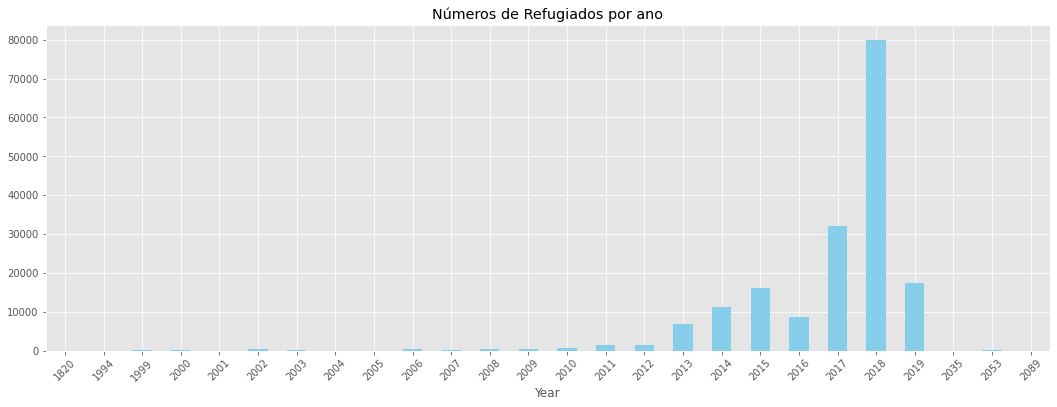

In [7]:
df.groupby('Year')['Quantidade'].sum().plot(kind='bar', rot=45, figsize=(18,6), color='skyblue', title='Números de Refugiados por ano')

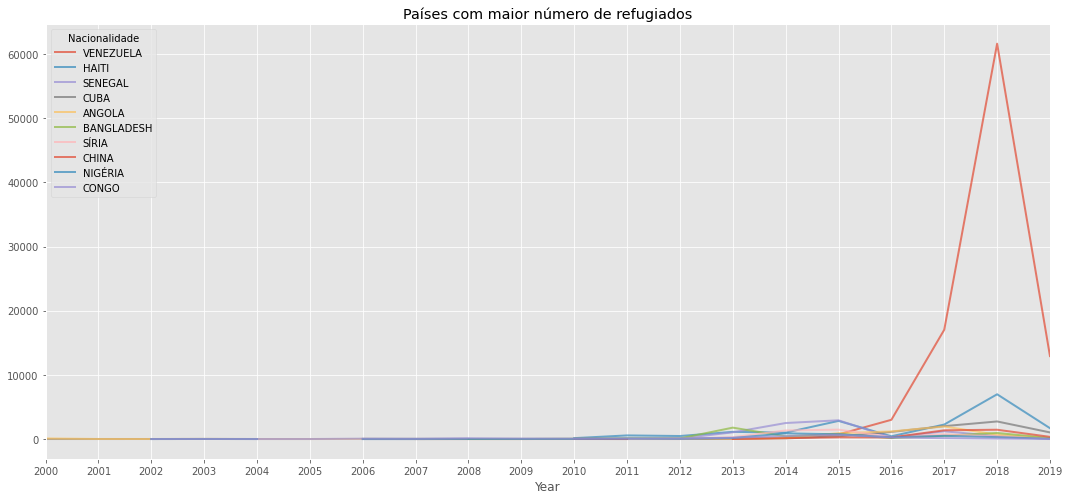

In [8]:
df_paises = df.groupby(['Year', 'Nacionalidade'])['Quantidade'].sum().unstack()
top_10 = df.groupby('Nacionalidade')['Quantidade'].sum().sort_values(ascending=False)[:10]
df_paises[top_10.index.to_list()].plot(figsize=(18,8), linewidth=2, alpha=0.7)
plt.title('Países com maior número de refugiados')
plt.xticks(np.arange(2000, 2020, 1))
plt.xlim(2000, 2019);

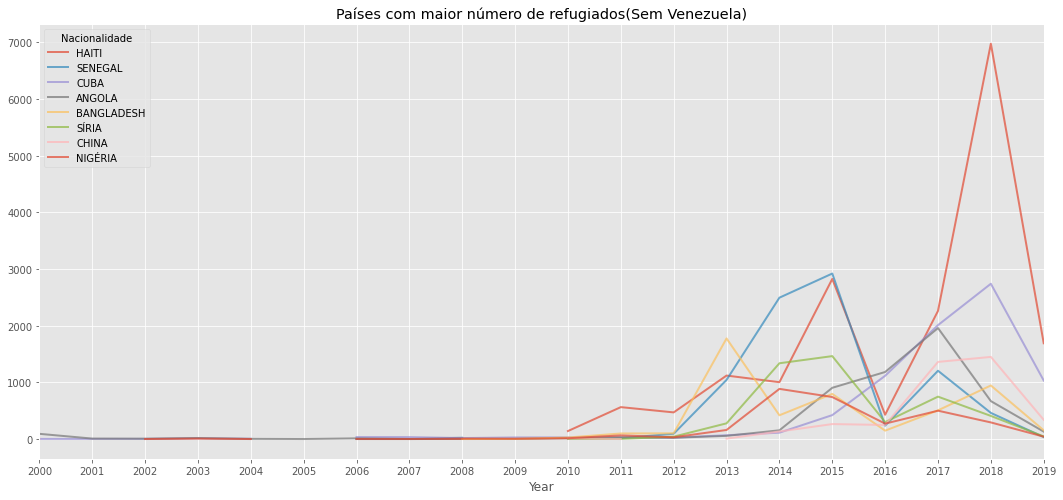

In [9]:
df_paises[top_10.index.to_list()[1:-1]].plot(figsize=(18,8), linewidth=2, alpha=0.7)
plt.title('Países com maior número de refugiados(Sem Venezuela)')
plt.xticks(np.arange(2000, 2020, 1))
plt.xlim(2000, 2019);

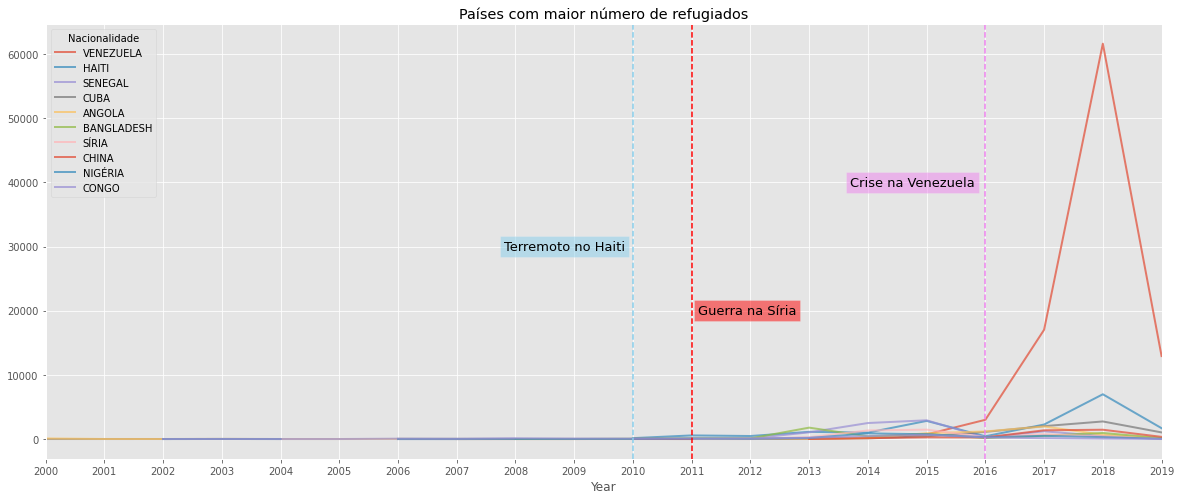

In [10]:
df_paises[top_10.index.to_list()].plot(figsize=(20,8), linewidth=2, alpha=0.7)
plt.title('Países com maior número de refugiados')
plt.xticks(np.arange(2000, 2020, 1))
plt.xlim(2000, 2019)
plt.axvline(x=2010, linestyle='--', color='skyblue')
plt.axvline(x=2011, linestyle='--', color='red')
plt.axvline(x=2016, linestyle='--', color='violet')
plt.text(2007.8, 30000, 'Terremoto no Haiti', va='center', bbox=dict(facecolor='skyblue', alpha=0.5), fontsize=13)
plt.text(2011.1, 20000, 'Guerra na Síria', va='center', bbox=dict(facecolor='red', alpha=0.5), fontsize=13)
plt.text(2013.7, 40000, 'Crise na Venezuela', va='center', bbox=dict(facecolor='violet', alpha=0.5), fontsize=13);

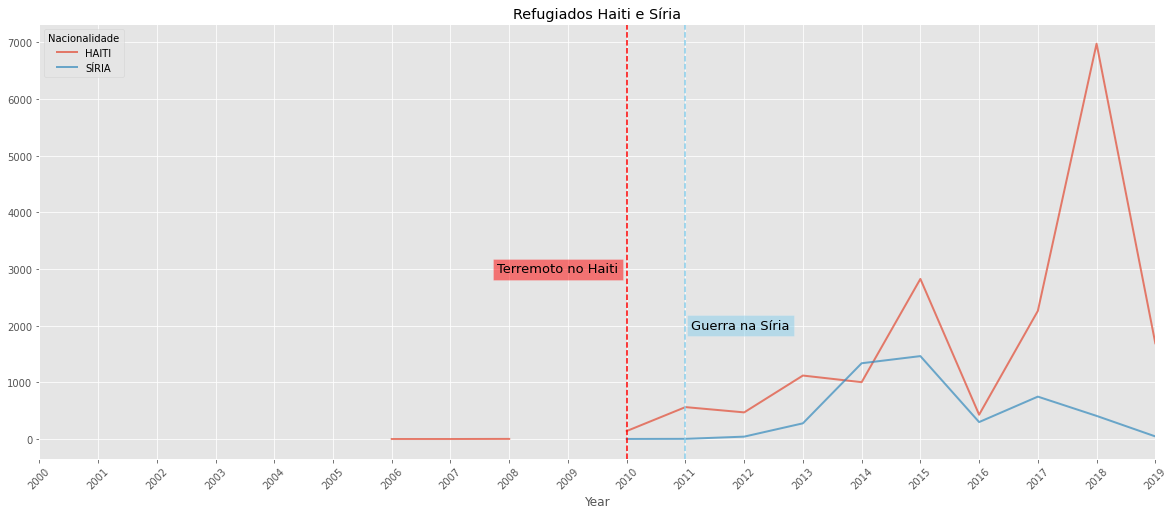

In [11]:
df_paises[['HAITI', 'SÍRIA']].plot(figsize=(20,8), linewidth=2, alpha=0.7, rot=45)
plt.title('Refugiados Haiti e Síria')
plt.xticks(np.arange(2000, 2020, 1))
plt.xlim(2000, 2019)
plt.axvline(x=2010, linestyle='--', color='red')
plt.axvline(x=2011, linestyle='--', color='skyblue')
plt.text(2007.8, 3000, 'Terremoto no Haiti', va='center', bbox=dict(facecolor='red', alpha=0.5), fontsize=13)
plt.text(2011.1, 2000, 'Guerra na Síria', va='center', bbox=dict(facecolor='skyblue', alpha=0.5), fontsize=13);

In [12]:
SUL = ['SC', 'RS', 'PR']
SUDESTE = ['MG', 'RJ', 'SP', 'ES']
CENTRO_OESTE = ['DF', 'GO', 'MT', 'MS' ]
NORDESTE = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
NORTE = ['AC', 'AP', 'AM', 'PA', 'RN', 'RR', 'TO']

In [13]:
def regiao(row):
    if row in SUL:
        return 'SUL'
    if row in SUDESTE:
        return 'SUDESTE'
    if row in CENTRO_OESTE:
        return 'CENTRO_OESTE'
    if row in NORDESTE:
        return 'NORDESTE'
    if row in NORTE:
        return 'NORTE'

In [14]:
df['REGIAO'] = df['UF'].apply(regiao)
df.head()

Tipo de Alertas e Restrições Nacionalidade    Mês/Ano  UF  Quantidade  Year  \
0       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO 2001-12-01  DF         1.0  2001   
1       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO 2010-01-01  DF         1.0  2010   
2       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO 2010-03-01  DF         2.0  2010   
3       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO 2010-03-01  SP         2.0  2010   
4       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO 2010-08-01  DF         1.0  2010   

         REGIAO  
0  CENTRO_OESTE  
1  CENTRO_OESTE  
2  CENTRO_OESTE  
3       SUDESTE  
4  CENTRO_OESTE

In [15]:
regiao_sul = df.query('REGIAO == "SUL"')
regiao_sudeste = df.query('REGIAO == "SUDESTE"')
regiao_norte = df.query('REGIAO == "NORTE"')
regiao_nordeste = df.query('REGIAO == "NORDESTE"')
regiao_centro_oeste = df.query('REGIAO == "CENTRO_OESTE"')

In [16]:
def df_plot(df, title='title'):
    regiao = df.groupby(['Nacionalidade', 'Year'])['Quantidade'].sum().unstack()
    mask = regiao.T.sum().sort_values(ascending=False)[:5]
    ax = regiao.T[mask.index].plot(figsize=(18,8), rot=45, linewidth=2, alpha=0.8, title=title)
    plt.xticks(np.arange(2000, 2020, 1))
    plt.xlim(2000, 2019)
    return ax

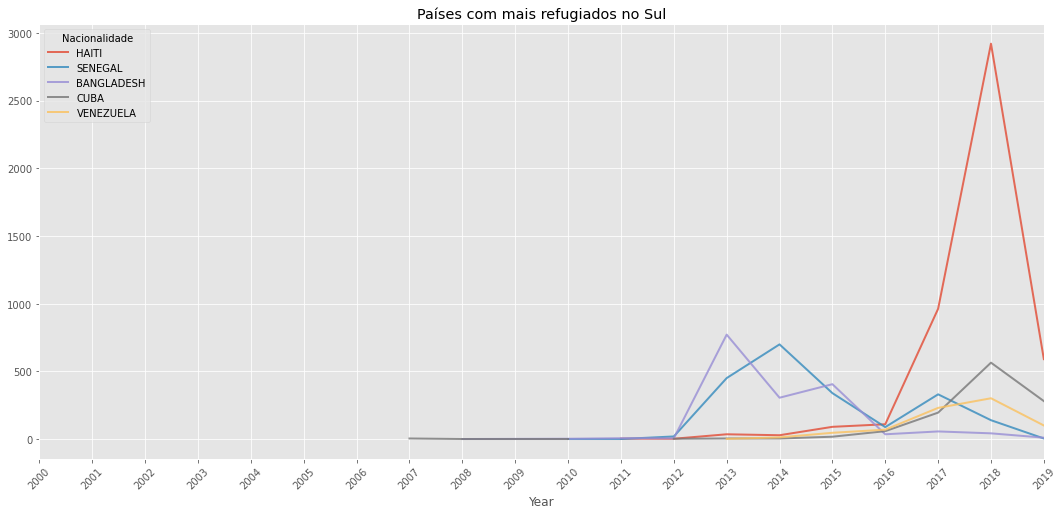

In [17]:
df_plot(regiao_sul, 'Países com mais refugiados no Sul');

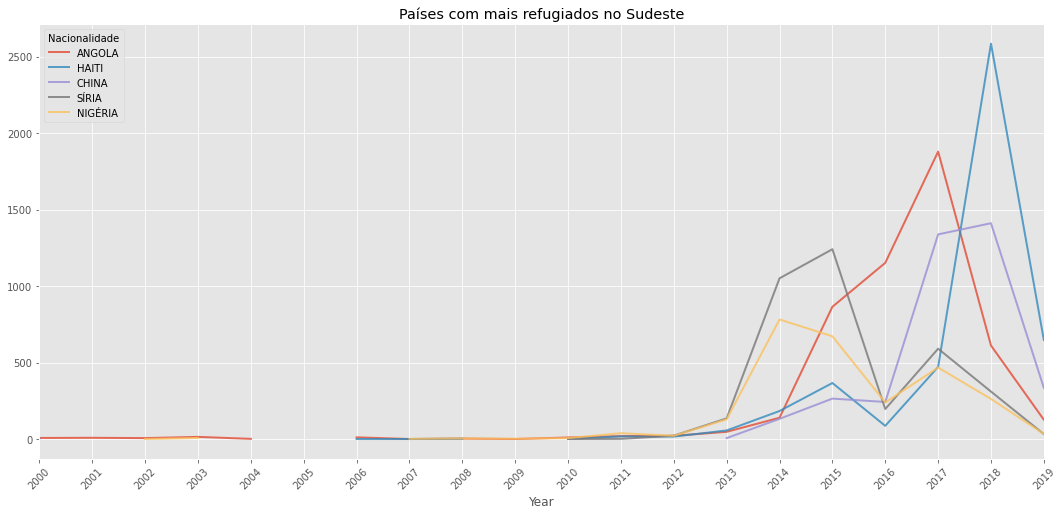

In [18]:
df_plot(regiao_sudeste, 'Países com mais refugiados no Sudeste');

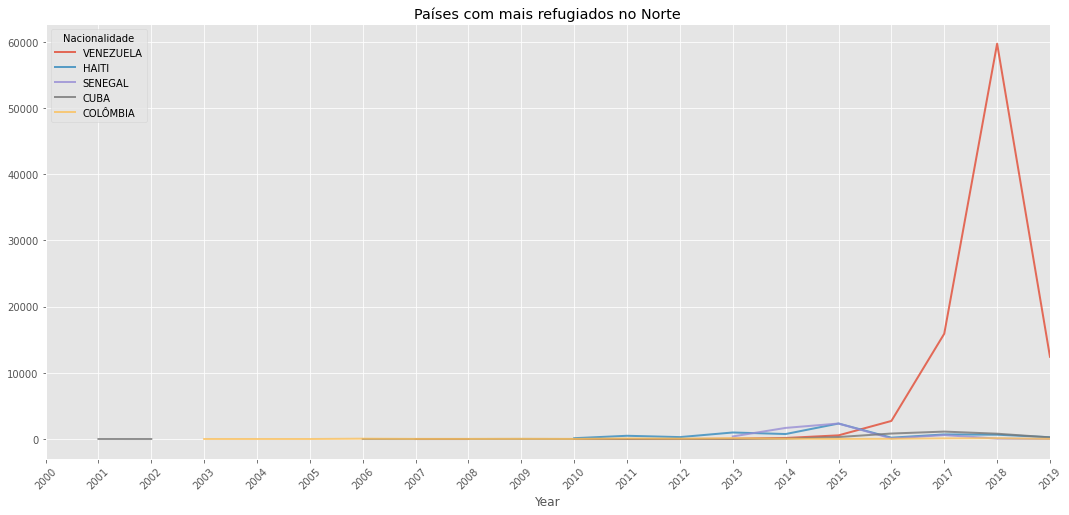

In [19]:
df_plot(regiao_norte, 'Países com mais refugiados no Norte');

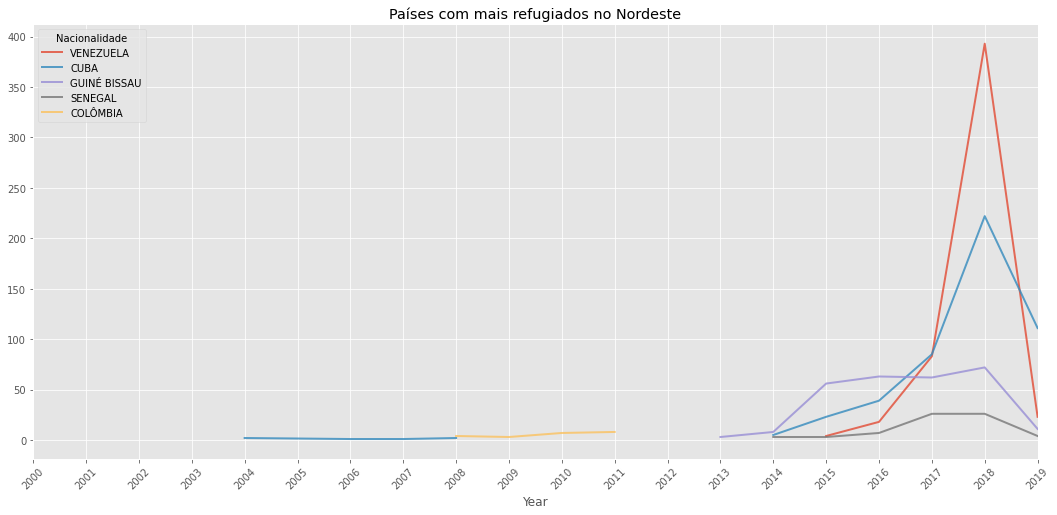

In [20]:
df_plot(regiao_nordeste, 'Países com mais refugiados no Nordeste');

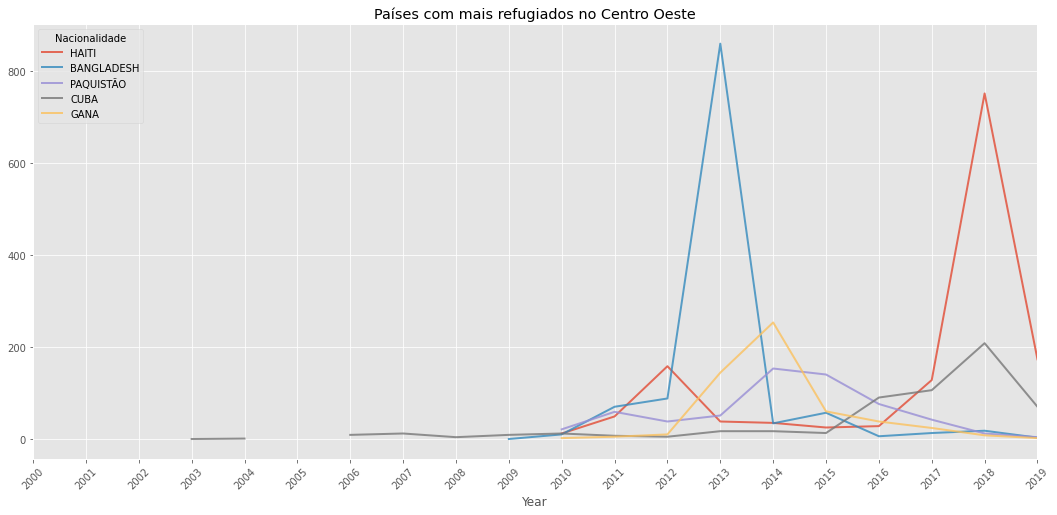

In [21]:
df_plot(regiao_centro_oeste, 'Países com mais refugiados no Centro Oeste');

In [22]:
wiki_url = 'https://pt.wikipedia.org/wiki/Compara%C3%A7%C3%A3o_entre_c%C3%B3digos_de_pa%C3%ADses_COI,_FIFA,_e_ISO_3166'
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text, 'xml')

table = soup.find('table',{'class': "wikitable sortable"})
wiki = pd.read_html(str(table), header=0)[0]
wiki.head()

Bandeira  COI FIFA ISO-3 ISO-2           País
0    Afeganistão  AFG  AFG   AFG    AF    Afeganistão
1  África do Sul  RSA  RSA   ZAF    ZA  África do Sul
2    Ilhas Åland  NaN  NaN   ALA    AX   Ilhas Alanda
3        Albânia  ALB  ALB   ALB    AL        Albânia
4       Alemanha  GER  GER   DEU    DE       Alemanha

In [23]:
wiki['País'] = wiki['País'].str.upper()
wiki.drop('Bandeira', axis=1, inplace=True)
wiki.rename(columns={'País': 'Nacionalidade'}, inplace=True)
wiki.head()

COI FIFA ISO-3 ISO-2  Nacionalidade
0  AFG  AFG   AFG    AF    AFEGANISTÃO
1  RSA  RSA   ZAF    ZA  ÁFRICA DO SUL
2  NaN  NaN   ALA    AX   ILHAS ALANDA
3  ALB  ALB   ALB    AL        ALBÂNIA
4  GER  GER   DEU    DE       ALEMANHA

In [24]:
merge_df = pd.DataFrame.merge(df, wiki, on='Nacionalidade')
merge_df.head()

Tipo de Alertas e Restrições Nacionalidade    Mês/Ano  UF  Quantidade  Year  \
0       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO 2001-12-01  DF         1.0  2001   
1       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO 2010-01-01  DF         1.0  2010   
2       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO 2010-03-01  DF         2.0  2010   
3       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO 2010-03-01  SP         2.0  2010   
4       SOLICITAÇÃO DE REFÚGIO   AFEGANISTÃO 2010-08-01  DF         1.0  2010   

         REGIAO  COI FIFA ISO-3 ISO-2  
0  CENTRO_OESTE  AFG  AFG   AFG    AF  
1  CENTRO_OESTE  AFG  AFG   AFG    AF  
2  CENTRO_OESTE  AFG  AFG   AFG    AF  
3       SUDESTE  AFG  AFG   AFG    AF  
4  CENTRO_OESTE  AFG  AFG   AFG    AF

In [25]:
quantidade = merge_df.groupby(["Nacionalidade", "Year", 'ISO-3'])['Quantidade'].sum().reset_index()
mundo = quantidade.sort_values(by='Year').reset_index()
sem_venezuela = mundo[mundo['Nacionalidade'] != 'VENEZUELA']

In [26]:
fig = px.choropleth(mundo, locations="ISO-3", color="Quantidade", hover_name="Nacionalidade", animation_frame="Year", 
                    projection="natural earth", title="Refugiados Globo")
fig.show()

In [27]:
fig = px.choropleth(sem_venezuela, locations="ISO-3", color="Quantidade", hover_name="Nacionalidade", animation_frame="Year", 
                    projection="natural earth", title='Refugiados Globo (Sem Venezuela)')
fig.show()

In [28]:
sem_venezuela = sem_venezuela.groupby(['Nacionalidade', 'ISO-3'])['Quantidade'].sum().reset_index()
fig = px.choropleth(sem_venezuela, locations="ISO-3", color="Quantidade", hover_name="Nacionalidade", 
                    projection="natural earth", title='Refugiados Globo (Sem Venezuela)' )
fig.show()

In [29]:
sem_venezuela = sem_venezuela.groupby(['Nacionalidade', 'ISO-3'])['Quantidade'].sum().reset_index()
fig = px.choropleth(sem_venezuela, locations="ISO-3", color="Quantidade", hover_name="Nacionalidade", 
                    projection="natural earth", title='Refugiados Globo (Sem Venezuela)' )
fig.show()

In [30]:
paises = df.groupby(['Mês/Ano', 'Nacionalidade'])['Quantidade'].sum().reset_index()
paises = paises.pivot_table(index='Mês/Ano', columns='Nacionalidade', values='Quantidade').fillna(0).cumsum()
top_50 = df.groupby('Nacionalidade')['Quantidade'].sum().sort_values(ascending=False)[:50]
paises.head()

Nacionalidade  AFEGANISTÃO  ALBÂNIA  ALEMANHA  ANDORRA  ANGOLA  APÁTRIDA  \
Mês/Ano                                                                    
1820-03-01             0.0      0.0       0.0      0.0     0.0       0.0   
1994-05-01             0.0      0.0       0.0      0.0     0.0       0.0   
1999-03-01             0.0      0.0       0.0      0.0     3.0       0.0   
1999-04-01             0.0      0.0       0.0      0.0     7.0       0.0   
1999-05-01             0.0      0.0       0.0      0.0     7.0       0.0   

Nacionalidade  ARGENTINA  ARGÉLIA  ARMÊNIA  ARÁBIA SAUDITA  ...  UZBEQUISTÃO  \
Mês/Ano                                                     ...                
1820-03-01           0.0      0.0      0.0             0.0  ...          0.0   
1994-05-01           0.0      0.0      0.0             0.0  ...          0.0   
1999-03-01           0.0      0.0      0.0             0.0  ...          0.0   
1999-04-01           0.0      0.0      0.0             0.0  ...          0.0   
1999-05-01           0.0      0.0      0.0             0.0  ...          0.0   

Nacionalidade  VANUATU  VATICANO  VENEZUELA  VIETNÃ  ZAIRE  ZIMBÁBUE  ZÂMBIA  \
Mês/Ano                                                                        
1820-03-01         0.0       0.0        0.0     0.0    0.0       0.0     0.0   
1994-05-01         0.0       0.0        0.0     0.0    0.0       0.0     0.0   
1999-03-01         0.0       0.0        0.0     0.0    1.0       0.0     0.0   
1999-04-01         0.0       0.0        0.0     0.0    1.0       0.0     0.0   
1999-05-01         0.0       0.0        0.0     0.0    1.0       0.0     0.0   

Nacionalidade  ÁFRICA DO SUL  ÍNDIA  
Mês/Ano                              
1820-03-01               0.0   27.0  
1994-05-01               0.0   27.0  
1999-03-01               0.0   27.0  
1999-04-01               0.0   27.0  
1999-05-01               0.0   27.0  

[5 rows x 165 columns]

In [31]:
paises_bar_chart = bcr.bar_chart_race(
    df=paises[top_50.index],
    filename=None,
    period_length=500,
    figsize=(7, 4),
    n_bars=10,
    bar_size=.5,
    filter_column_colors=True,
    period_fmt= '%B %d, %Y',
    title='Solicitação de Refúgio por País')

In [32]:
paises_bar_chart